In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
# Read in CSV file
data = pd.read_csv("data.csv") 
data

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2,3,6,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,4860406,2011,10,6,16,2,1,04,01,1,...,01,01,2003,01,M,24,11,1,02,1
1,4860407,2011,10,6,16,2,1,04,01,1,...,01,01,2003,02,M,09,31,2,02,2
2,4860408,2011,10,6,16,2,1,04,01,1,...,01,01,2003,03,F,07,22,2,02,2
3,4860409,2011,10,6,14,2,2,UU,UU,1,...,01,01,2007,01,M,50,11,1,02,1
4,4860410,2011,10,6,14,2,2,UU,UU,1,...,01,01,2007,02,M,15,13,1,02,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,5860401,2014,UU,U,UU,2,UU,UU,01,U,...,13,07,UUUU,01,M,24,11,1,NN,1
999996,5860402,2014,UU,U,23,2,01,06,05,1,...,1,14,2006,01,M,29,96,2,09,5
999997,5860403,2014,UU,U,14,2,01,02,01,1,...,1,01,2006,01,F,UU,11,2,01,1
999998,5860404,2014,UU,U,22,1,01,06,01,2,...,1,22,UUUU,01,M,67,12,3,01,U


# Data Cleaning

In [3]:
# Data cleaning: P_ISEV
data = data[data['P_ISEV'] != "N"]
data = data[data['P_ISEV'] != "U"]
data = data[data['P_ISEV'] != "X"]
data['P_ISEV'] = pd.to_numeric(data.P_ISEV)
data.loc[(data.P_ISEV == 1),'P_ISEV'] = 0
data.loc[(data.P_ISEV == 2),'P_ISEV'] = 1
data.loc[(data.P_ISEV == 3),'P_ISEV'] = 1
data['P_ISEV'] = pd.Categorical(data.P_ISEV)
data['P_ISEV'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [4]:
# Data cleaning: P_SEX
data = data[data['P_SEX'] != "N"]
data = data[data['P_SEX'] != "U"] 
data.P_SEX = pd.Categorical(data.P_SEX)
data['P_SEX'].unique()

[M, F]
Categories (2, object): [M, F]

In [5]:
# Data cleaning: C_YEAR
data.C_YEAR = pd.Categorical(pd.to_numeric(data.C_YEAR))
data['C_YEAR'].unique()

[2011, 2012, 2013, 2014]
Categories (4, int64): [2011, 2012, 2013, 2014]

In [6]:
# Data cleaning: C_MNTH
data = data[data['C_MNTH'] != "UU"]
data = data[data['C_MNTH'] != "XX"]
data.C_MNTH = pd.Categorical(pd.to_numeric(data.C_MNTH))
data['C_MNTH'].unique()

[10, 11, 12, 1, 2, ..., 5, 6, 7, 8, 9]
Length: 12
Categories (12, int64): [10, 11, 12, 1, ..., 6, 7, 8, 9]

In [7]:
# Data cleaning: C_WDAY
data = data[data['C_WDAY'] != "U"] 
data = data[data['C_WDAY'] != "X"] 
data.C_WDAY = pd.Categorical(pd.to_numeric(data.C_WDAY))
data['C_WDAY'].unique()

[6, 7, 1, 2, 3, 4, 5]
Categories (7, int64): [6, 7, 1, 2, 3, 4, 5]

In [8]:
# Data cleaning: C_HOUR
data = data[data['C_HOUR'] != "UU"]
data = data[data['C_HOUR'] != "XX"]
# Make colliosn hour group categories
data['C_HOUR'] = pd.to_numeric(data['C_HOUR'])
data['C_HOUR'] = pd.cut(data['C_HOUR'], bins=[0,3,6,9,12,15,18,21,23,float('inf')], right=False)
data['C_HOUR'].unique()

[[15.0, 18.0), [12.0, 15.0), [18.0, 21.0), [9.0, 12.0), [3.0, 6.0), [0.0, 3.0), [6.0, 9.0), [21.0, 23.0), [23.0, inf)]
Categories (9, interval[float64]): [[0.0, 3.0) < [3.0, 6.0) < [6.0, 9.0) < [9.0, 12.0) ... [15.0, 18.0) < [18.0, 21.0) < [21.0, 23.0) < [23.0, inf)]

In [9]:
# Data cleaning: C_VEHS
data = data[data['C_VEHS'] != "UU"]
data = data[data['C_VEHS'] != "XX"]
# Make vehicle collided group categories rather than usuing indidvidual number of cars in collision
data['C_VEHS'] = pd.to_numeric(data['C_VEHS'])
data['C_VEHS'] = pd.cut(data['C_VEHS'], bins=[1,5,26,float('inf')], right=False)
data['C_VEHS'].unique()

[[1.0, 5.0), [5.0, 26.0), [26.0, inf), NaN]
Categories (3, interval[float64]): [[1.0, 5.0) < [5.0, 26.0) < [26.0, inf)]

In [10]:
# Data cleaning: C_CONF
data = data[data['C_CONF'] != "QQ"]
data = data[data['C_CONF'] != "UU"]
data = data[data['C_CONF'] != "XX"]
data['C_CONF'] = pd.to_numeric(data['C_CONF'])
data['C_CONF'] = pd.cut(data['C_CONF'], bins=[1,21,31,float('inf')], right=False)
data['C_CONF'].unique()

[[1.0, 21.0), [31.0, inf), [21.0, 31.0)]
Categories (3, interval[float64]): [[1.0, 21.0) < [21.0, 31.0) < [31.0, inf)]

In [11]:
# Data cleaning: C_RCFG
data = data[data['C_RCFG'] != "QQ"]
data = data[data['C_RCFG'] != "UU"] 
data = data[data['C_RCFG'] != "XX"]
data.C_RCFG = pd.Categorical(pd.to_numeric(data.C_RCFG))
data['C_RCFG'].unique()

[1, 2, 4, 3, 5, 8, 6, 9, 7, 10]
Categories (10, int64): [1, 2, 4, 3, ..., 6, 9, 7, 10]

In [12]:
# Data cleaning: C_WTHR
data = data[data['C_WTHR'] !=  "Q"]
data = data[data['C_WTHR'] !=  "U"]
data = data[data['C_WTHR'] !=  "X"]
data.C_WTHR = pd.Categorical(pd.to_numeric(data.C_WTHR))
data['C_WTHR'].unique()

[1, 3, 4, 2, 7, 6, 5]
Categories (7, int64): [1, 3, 4, 2, 7, 6, 5]

In [13]:
# Data cleaning: C_RSUR
data = data[data['C_RSUR'] !=  "Q"]
data = data[data['C_RSUR'] !=  "U"]
data = data[data['C_RSUR'] !=  "X"]
data.C_RSUR = pd.Categorical(pd.to_numeric(data.C_RSUR))
data['C_RSUR'].unique()

[1, 2, 5, 3, 9, 6, 8, 4, 7]
Categories (9, int64): [1, 2, 5, 3, ..., 6, 8, 4, 7]

In [14]:
# Data cleaning: C_RALN 
data = data[data['C_RALN'] != "Q"] 
data = data[data['C_RALN'] != "U"] 
data = data[data['C_RALN'] != "X"]
data.C_RALN = pd.Categorical(pd.to_numeric(data.C_RALN))
data['C_RALN'].unique()

[1, 4, 3, 5, 2, 6]
Categories (6, int64): [1, 4, 3, 5, 2, 6]

In [15]:
# Data cleaning: C_TRAF 
data = data[data['C_TRAF'] != "QQ"]
data = data[data['C_TRAF'] != "UU"]
data = data[data['C_TRAF'] != "XX"]
data['C_TRAF'] = pd.to_numeric(data['C_TRAF'])
data['C_TRAF'] = pd.cut(data['C_TRAF'], bins=[1,3,8,10,13,15,float('inf')], right=False)
data['C_TRAF'].unique()

[[15.0, inf), [3.0, 8.0), [1.0, 3.0), [10.0, 13.0), [13.0, 15.0), [8.0, 10.0)]
Categories (6, interval[float64]): [[1.0, 3.0) < [3.0, 8.0) < [8.0, 10.0) < [10.0, 13.0) < [13.0, 15.0) < [15.0, inf)]

In [16]:
# Data cleaning: V_ID 
data = data[data['V_ID'] != "UU"]
data.V_ID = pd.Categorical(pd.to_numeric(data.V_ID))
data['V_ID'].unique()  

[1, 2, 3, 99, 4, ..., 73, 74, 75, 76, 77]
Length: 78
Categories (78, int64): [1, 2, 3, 99, ..., 74, 75, 76, 77]

In [17]:
# Data cleaning: V_TYPE
data = data[data['V_TYPE'] != "QQ"] 
data = data[data['V_TYPE'] != "UU"] 
data = data[data['V_TYPE'] != "NN"] 
data['V_TYPE'] = pd.to_numeric(data['V_TYPE'])
data['V_TYPE'] = pd.cut(data['V_TYPE'], bins=[0,5,8,9,float('inf')], right=False)
data['V_TYPE'].unique()

[[0.0, 5.0), [9.0, inf), [8.0, 9.0), [5.0, 8.0)]
Categories (4, interval[float64]): [[0.0, 5.0) < [5.0, 8.0) < [8.0, 9.0) < [9.0, inf)]

In [18]:
# Data cleaning: V_YEAR
data = data[data['V_YEAR'] != "NNNN"] 
data = data[data['V_YEAR'] != "UUUU"] 
data = data[data['V_YEAR'] != "QQQQ"]
# Make vehicle year group categories rather than using indidvidual years
data['V_YEAR'] = pd.to_numeric(data['V_YEAR'])
data['V_YEAR'] = pd.cut(data['V_YEAR'], bins=[1900,1950,1980,1990,2000,2010,float('inf')], right=False)
data['V_YEAR'].unique()

[[2000.0, 2010.0), [2010.0, inf), [1990.0, 2000.0), [1980.0, 1990.0), [1950.0, 1980.0), [1900.0, 1950.0)]
Categories (6, interval[float64]): [[1900.0, 1950.0) < [1950.0, 1980.0) < [1980.0, 1990.0) < [1990.0, 2000.0) < [2000.0, 2010.0) < [2010.0, inf)]

In [19]:
# Data cleaning: P_ID
data = data[data['P_ID'] != "NN"]
data = data[data['P_ID'] != "UU"]
data.P_ID = pd.Categorical(pd.to_numeric(data.P_ID))
data['P_ID'].unique()  

[1, 2, 3, 4, 5, ..., 89, 90, 91, 92, 93]
Length: 93
Categories (93, int64): [1, 2, 3, 4, ..., 90, 91, 92, 93]

In [20]:
# Data cleaning: P_PSN
data = data[data['P_PSN'] != "NN"]
data = data[data['P_PSN'] != "QQ"]
data = data[data['P_PSN'] != "UU"]
data = data[data['P_PSN'] != "XX"]
# Make person position categories
data['P_PSN'] = pd.to_numeric(data['P_PSN'])

# 96 is position unknown so get rid of rows with this
data = data[data['P_PSN'] != 96]
data['P_PSN'] = pd.cut(data['P_PSN'], bins=[11,21,31,34,98,99,float('inf')], right=False)
data['P_PSN'].unique()

[[11.0, 21.0), [31.0, 34.0), [21.0, 31.0), [98.0, 99.0), [34.0, 98.0)]
Categories (5, interval[float64]): [[11.0, 21.0) < [21.0, 31.0) < [31.0, 34.0) < [34.0, 98.0) < [98.0, 99.0)]

In [21]:
# Data cleaning: P_SAFE
data = data[data['P_SAFE'] != "NN"]
data = data[data['P_SAFE'] != "QQ"]
data = data[data['P_SAFE'] != "UU"]
data = data[data['P_SAFE'] != "XX"]
data.P_SAFE = pd.Categorical(pd.to_numeric(data.P_SAFE))
data['P_SAFE'].unique()  

[2, 1, 9, 13, 12, 10, 11]
Categories (7, int64): [2, 1, 9, 13, 12, 10, 11]

In [22]:
# Data cleaning: P_USER
data = data[data['P_USER'] != "U"] 
data.P_USER = pd.Categorical(pd.to_numeric(data.P_USER))
data['P_USER'].unique()  

[1, 2, 5, 4]
Categories (4, int64): [1, 2, 5, 4]

In [23]:
# Data cleaning: P_AGE
data = data[data['P_AGE'] != "NN"]
data = data[data['P_AGE'] != "UU"]
data = data[data['P_AGE'] != "XX"]
# Make age-group categories rather than usuing indidvidual ages
data['P_AGE'] = pd.to_numeric(data['P_AGE'])
data['P_AGE'] = pd.cut(data['P_AGE'], bins=[0,10,20,30,40,50,60,70,80,90,float('inf')], right=False)
data['P_AGE'].unique()  

[[20.0, 30.0), [0.0, 10.0), [60.0, 70.0), [40.0, 50.0), [10.0, 20.0), [70.0, 80.0), [80.0, 90.0), [50.0, 60.0), [30.0, 40.0), [90.0, inf)]
Categories (10, interval[float64]): [[0.0, 10.0) < [10.0, 20.0) < [20.0, 30.0) < [30.0, 40.0) ... [60.0, 70.0) < [70.0, 80.0) < [80.0, 90.0) < [90.0, inf)]

# Data Exploration

In [24]:
data['P_ISEV'].value_counts()

1    314346
0    245002
Name: P_ISEV, dtype: int64

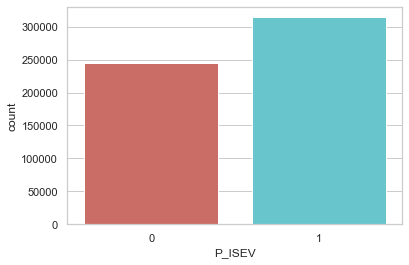

In [25]:
sns.countplot(x='P_ISEV', data=data, palette='hls')
plt.show()

In [26]:
data['C_YEAR'].value_counts()

2012    180168
2013    178941
2014    165375
2011     34864
Name: C_YEAR, dtype: int64

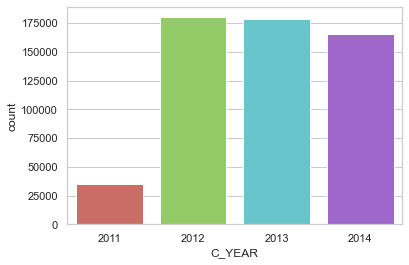

In [27]:
sns.countplot(x='C_YEAR', data=data, palette='hls')
plt.show()

In [28]:
data['C_MNTH'].value_counts()

12    60710
11    60444
10    51061
8     48805
7     48313
9     46792
6     45883
1     45386
5     42674
2     38278
3     36725
4     34277
Name: C_MNTH, dtype: int64

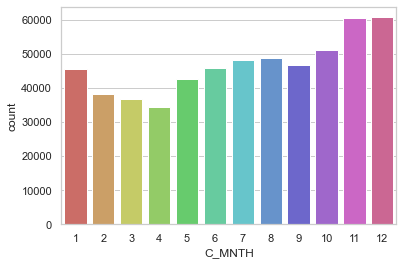

In [29]:
sns.countplot(x='C_MNTH', data=data, palette='hls')
plt.show()

In [30]:
data['C_WDAY'].value_counts()

5    95259
4    85286
6    79738
3    79565
2    79213
1    74237
7    66050
Name: C_WDAY, dtype: int64

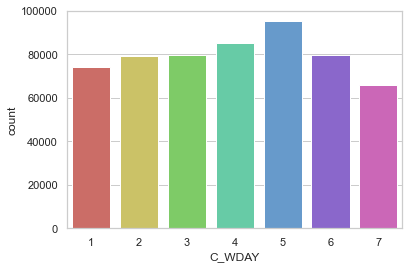

In [31]:
sns.countplot(x='C_WDAY', data=data, palette='hls')
plt.show()

In [32]:
data['C_HOUR'].value_counts()

[15.0, 18.0)    153215
[12.0, 15.0)    110636
[18.0, 21.0)     81906
[9.0, 12.0)      80144
[6.0, 9.0)       64625
[21.0, 23.0)     30359
[0.0, 3.0)       16528
[3.0, 6.0)       12280
[23.0, inf)       9655
Name: C_HOUR, dtype: int64

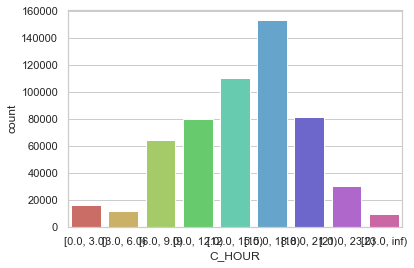

In [33]:
sns.countplot(x='C_HOUR', data=data, palette='hls')
plt.show()

In [34]:
data['C_VEHS'].value_counts()

[1.0, 5.0)     551665
[5.0, 26.0)      7441
[26.0, inf)       242
Name: C_VEHS, dtype: int64

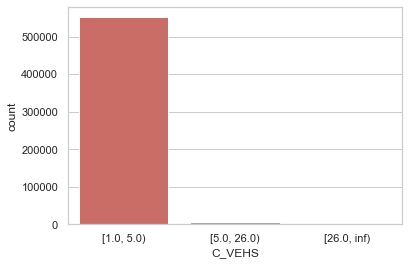

In [35]:
sns.countplot(x='C_VEHS', data=data, palette='hls')
plt.show()

In [36]:
data['C_CONF'].value_counts()

[21.0, 31.0)    234181
[31.0, inf)     222824
[1.0, 21.0)     102343
Name: C_CONF, dtype: int64

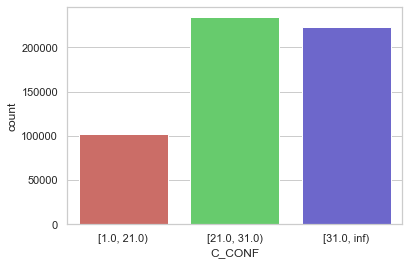

In [37]:
sns.countplot(x='C_CONF', data=data, palette='hls')
plt.show()

In [38]:
data['C_RCFG'].value_counts()

2     290706
1     230455
3      28568
5       5335
4       1527
8       1213
6        855
9        521
10       112
7         56
Name: C_RCFG, dtype: int64

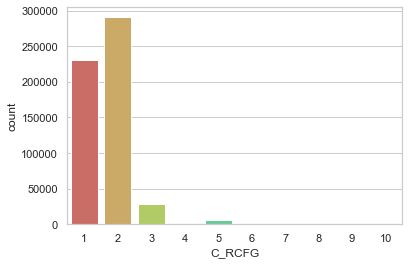

In [39]:
sns.countplot(x='C_RCFG', data=data, palette='hls')
plt.show()

In [40]:
data['C_WTHR'].value_counts()

1    401194
3     58952
2     50777
4     34477
6      9251
5      3007
7      1690
Name: C_WTHR, dtype: int64

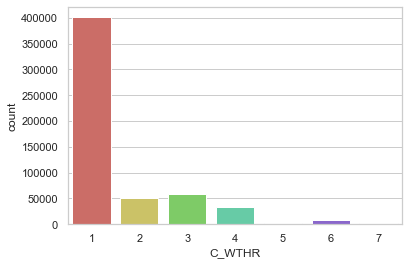

In [41]:
sns.countplot(x='C_WTHR', data=data, palette='hls')
plt.show()

In [42]:
data['C_RSUR'].value_counts()

1    380311
2    107833
5     34748
3     23980
4      9732
6      2196
7       391
8       124
9        33
Name: C_RSUR, dtype: int64

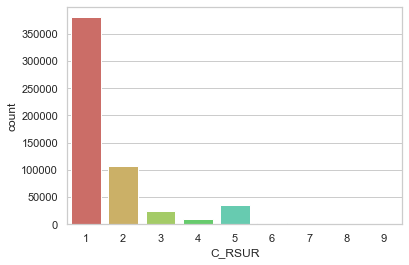

In [43]:
sns.countplot(x='C_RSUR', data=data, palette='hls')
plt.show()

In [44]:
data['C_RALN'].value_counts()

1    442924
2     53847
3     33352
4     18238
5      6189
6      4798
Name: C_RALN, dtype: int64

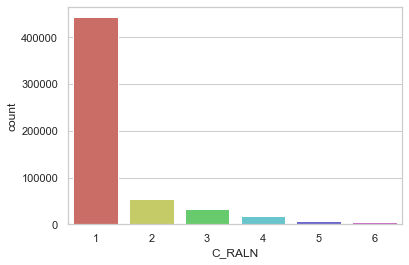

In [45]:
sns.countplot(x='C_RALN', data=data, palette='hls')
plt.show()

In [46]:
data['C_TRAF'].value_counts()

[15.0, inf)     292557
[1.0, 3.0)      184501
[3.0, 8.0)       77582
[8.0, 10.0)       3037
[10.0, 13.0)      1078
[13.0, 15.0)       593
Name: C_TRAF, dtype: int64

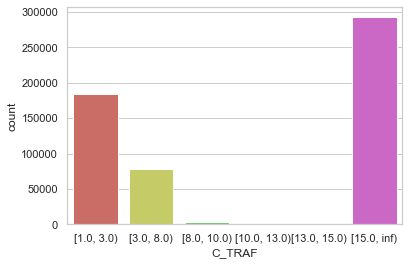

In [47]:
sns.countplot(x='C_TRAF', data=data, palette='hls')
plt.show()

In [48]:
data['V_TYPE'].value_counts()

[0.0, 5.0)    508686
[5.0, 8.0)     24107
[9.0, inf)     20011
[8.0, 9.0)      6544
Name: V_TYPE, dtype: int64

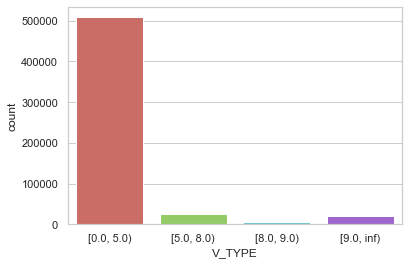

In [49]:
sns.countplot(x='V_TYPE', data=data, palette='hls')
plt.show()

In [50]:
data['V_YEAR'].value_counts()

[2000.0, 2010.0)    351456
[2010.0, inf)       134051
[1990.0, 2000.0)     68597
[1980.0, 1990.0)      4409
[1950.0, 1980.0)       793
[1900.0, 1950.0)        42
Name: V_YEAR, dtype: int64

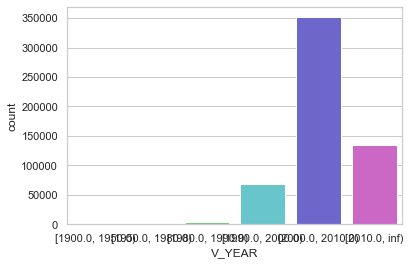

In [51]:
sns.countplot(x='V_YEAR', data=data, palette='hls')
plt.show()

In [52]:
data['P_SEX'].value_counts()

M    294077
F    265271
Name: P_SEX, dtype: int64

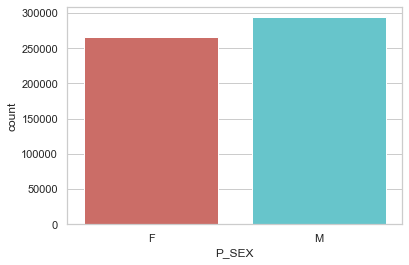

In [53]:
sns.countplot(x='P_SEX', data=data, palette='hls')
plt.show()

In [54]:
data['P_PSN'].value_counts()

[11.0, 21.0)    491971
[21.0, 31.0)     63540
[31.0, 34.0)      3728
[98.0, 99.0)        72
[34.0, 98.0)        37
[99.0, inf)          0
Name: P_PSN, dtype: int64

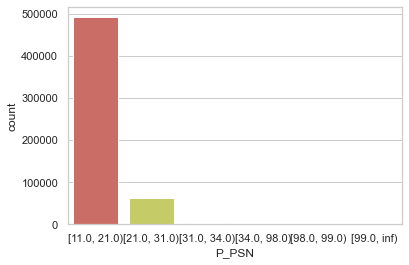

In [55]:
sns.countplot(x='P_PSN', data=data, palette='hls')
plt.show()

In [56]:
data['P_SAFE'].value_counts()

2     527845
9      10416
1      10371
13      6552
12      4162
10         2
11         0
Name: P_SAFE, dtype: int64

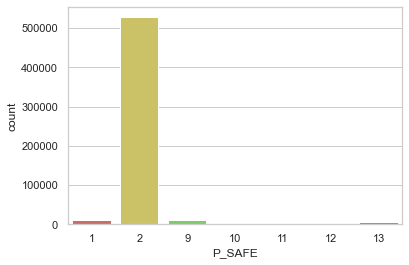

In [57]:
sns.countplot(x='P_SAFE', data=data, palette='hls')
plt.show()

In [58]:
data['P_USER'].value_counts()

1    383086
2    164757
5     10921
4       584
Name: P_USER, dtype: int64

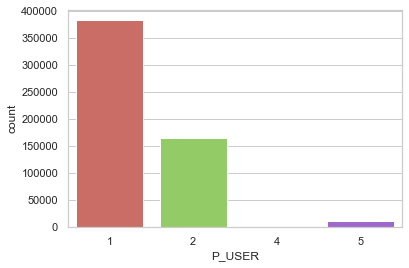

In [59]:
sns.countplot(x='P_USER', data=data, palette='hls')
plt.show()

# Logistic Regression

# SVM

In [60]:
X = data.drop('P_ISEV', axis=1)
y = data['P_ISEV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

# Neural Network